<a href="https://colab.research.google.com/github/shamim-io/Animal-Classification-Inception-V3/blob/master/inceptV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shutil

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Download Data

In [ ]:
# Uploading kaggle API key
from google.colab import files

files.upload()

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
# we need to set permissions 
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
# download kaggle dataset
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 96% 360M/376M [00:14<00:00, 23.9MB/s]
100% 376M/376M [00:14<00:00, 26.7MB/s]


In [ ]:
! mkdir train
! unzip -q animal-image-datasetdog-cat-and-panda.zip -d train
#!unzip -q file[.zip] -d [exdir]

mkdir: cannot create directory ‘train’: File exists


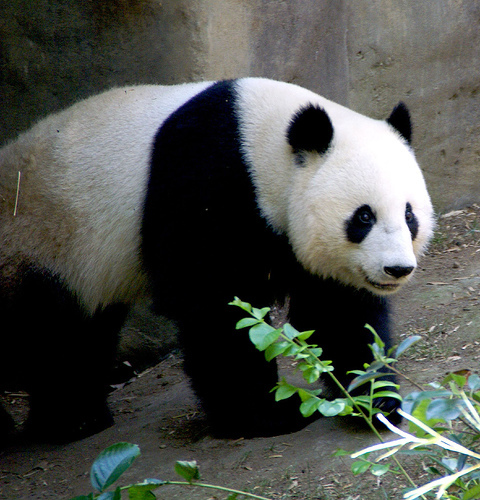

In [ ]:
image = Image.open('animals/panda/panda_00001.jpg')
image

# Resizing the images:

In [ ]:
path = 'animals/cats/'
img_cats = os.listdir(path)

In [ ]:
for i in range(len(os.listdir(path))):
    image = Image.open(path + img_cats[i])
    new_image = image.resize((299, 299))   
    new_image.save(path + img_cats[i])

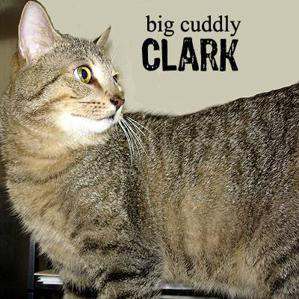

In [ ]:
image = Image.open(path + img_cats[15])
image

In [ ]:
path = 'animals/dogs/'
img_dogs = os.listdir(path)

In [ ]:
for i in range(len(os.listdir(path))):
    image = Image.open(path + img_dogs[i])
    new_image = image.resize((299, 299))   
    new_image.save(path + img_dogs[i])

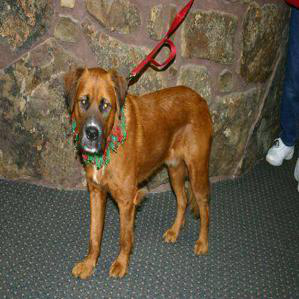

In [ ]:
image = Image.open(path + img_dogs[10])
image

In [ ]:
path = 'animals/panda/'
img_panda = os.listdir(path)

In [ ]:
for i in range(len(os.listdir(path))):
    image = Image.open(path + img_panda[i])
    new_image = image.resize((299, 299))   
    new_image.save(path + img_panda[i])

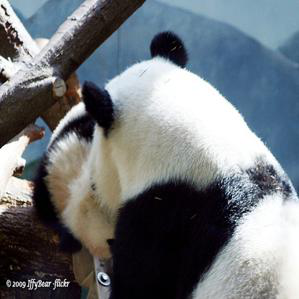

In [ ]:
image = Image.open(path + img_panda[10])
image

# Train-test split of the images

In [ ]:
cats_train, cats_test = train_test_split(img_cats, test_size=0.10)
dogs_train, dogs_test = train_test_split(img_dogs, test_size=0.10)
panda_train, panda_test = train_test_split(img_panda, test_size=0.10)

TRAIN_DIR = 'animals'
TEST_DIR = 'test'

os.mkdir('test')

os.mkdir('test/cats')
os.mkdir('test/dogs')
os.mkdir('test/panda')

source = "animals/cats"
destination = "test/cats"
for file in cats_test:
	new_path = shutil.move(f"{source}/{file}", destination)
	print(new_path)

source = "animals/dogs"
destination = "test/dogs"
for file in dogs_test:
	new_path = shutil.move(f"{source}/{file}", destination)
	print(new_path)

source = "animals/panda"
destination = "test/panda"
for file in panda_test:
	new_path = shutil.move(f"{source}/{file}", destination)
	print(new_path)

test/cats/cats_00995.jpg
test/cats/cats_00525.jpg
test/cats/cats_00330.jpg
test/cats/cats_00828.jpg
test/cats/cats_00957.jpg
test/cats/cats_00937.jpg
test/cats/cats_00175.jpg
test/cats/cats_00129.jpg
test/cats/cats_00966.jpg
test/cats/cats_00453.jpg
test/cats/cats_00622.jpg
test/cats/cats_00768.jpg
test/cats/cats_00067.jpg
test/cats/cats_00505.jpg
test/cats/cats_00011.jpg
test/cats/cats_00003.jpg
test/cats/cats_00005.jpg
test/cats/cats_00491.jpg
test/cats/cats_00887.jpg
test/cats/cats_00735.jpg
test/cats/cats_00422.jpg
test/cats/cats_00144.jpg
test/cats/cats_00155.jpg
test/cats/cats_00737.jpg
test/cats/cats_00724.jpg
test/cats/cats_00570.jpg
test/cats/cats_00859.jpg
test/cats/cats_00433.jpg
test/cats/cats_00072.jpg
test/cats/cats_00904.jpg
test/cats/cats_00964.jpg
test/cats/cats_00910.jpg
test/cats/cats_00387.jpg
test/cats/cats_00027.jpg
test/cats/cats_00519.jpg
test/cats/cats_00210.jpg
test/cats/cats_00344.jpg
test/cats/cats_00463.jpg
test/cats/cats_00837.jpg
test/cats/cats_00545.jpg


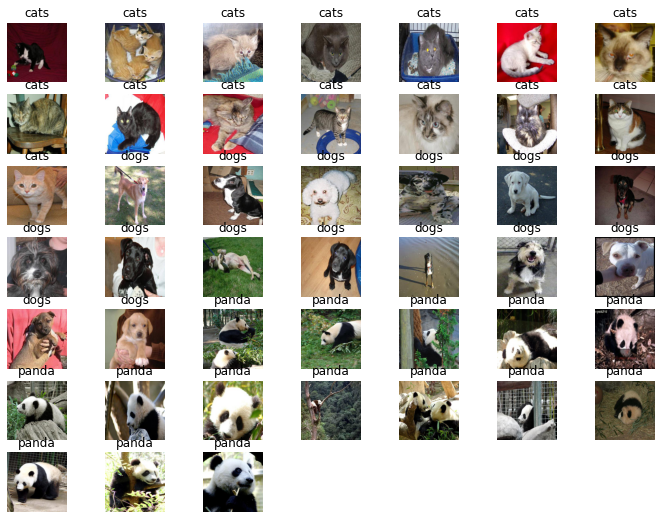

In [ ]:
cats = np.random.choice(cats_train, 15)
dogs = np.random.choice(dogs_train, 15)
panda = np.random.choice(panda_train, 15)
data = np.concatenate((cats, dogs, panda))
labels = 15 * ['cats'] + 15 *['dogs'] + 15 * ['panda']

N, R, C = 50, 7, 7
plt.figure(figsize=(12, 9))
path1 = 'animals/cats/'
path2 = 'animals/dogs/'
path3 = 'animals/panda/'

for k, (src, label) in enumerate(zip(data, labels)):
    if src in os.listdir(path1):
        s = path1 + src
    elif src in os.listdir(path2):
        s = path2 + src
    else:
        s = path3 + src
    im = Image.open(s).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

# Training model using Inception V3

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 3
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# Plot some images result of data augmentation.

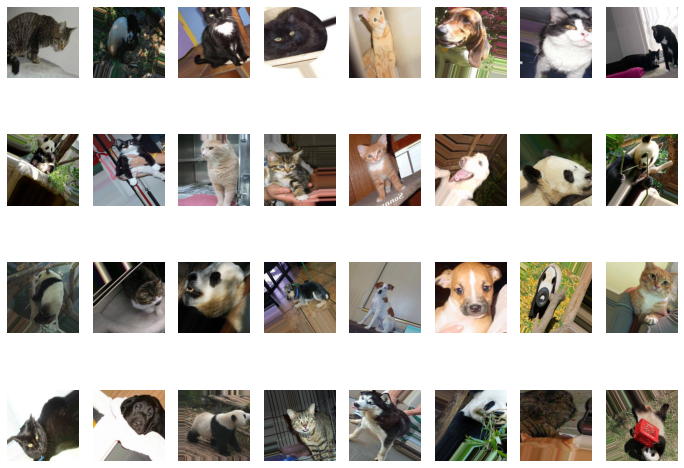

In [ ]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [ ]:
EPOCHS = 5
BATCH_SIZE = 10
STEPS_PER_EPOCH = 50
VALIDATION_STEPS = 5

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/5
50/50 [==============================] - 38s 766ms/step - loss: 0.3246 - accuracy: 0.8930 - val_loss: 0.1081 - val_accuracy: 0.9750
Epoch 2/5
50/50 [==============================] - 36s 724ms/step - loss: 0.0940 - accuracy: 0.9756 - val_loss: 0.0546 - val_accuracy: 0.9937
Epoch 3/5
50/50 [==============================] - 36s 719ms/step - loss: 0.0683 - accuracy: 0.9810 - val_loss: 0.0620 - val_accuracy: 0.9812
Epoch 4/5
50/50 [==============================] - 36s 715ms/step - loss: 0.0534 - accuracy: 0.9873 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 36s 715ms/step - loss: 0.0478 - accuracy: 0.9823 - val_loss: 0.0259 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: filename.model/assets


In [ ]:
history.history

{'accuracy': [0.8930379748344421,
  0.9756249785423279,
  0.9810126423835754,
  0.9873417615890503,
  0.9822784662246704],
 'loss': [0.32459694147109985,
  0.09401658177375793,
  0.06829500198364258,
  0.05341218411922455,
  0.04783524200320244],
 'val_accuracy': [0.9750000238418579,
  0.9937499761581421,
  0.981249988079071,
  1.0,
  1.0],
 'val_loss': [0.10809789597988129,
  0.054554931819438934,
  0.06197717785835266,
  0.018738042563199997,
  0.025895286351442337]}

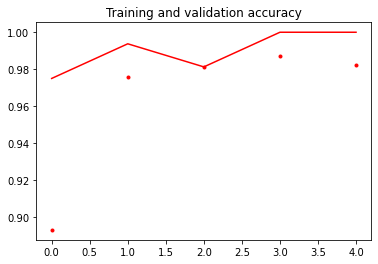

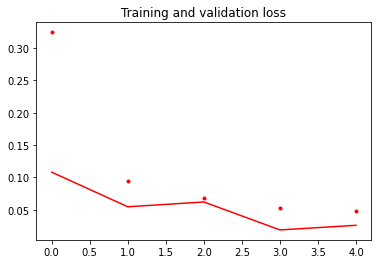

In [ ]:
def plot_training(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
plot_training(history)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("cat", "dog", "panda")
    preds_pos = np.arange(len(labels))
    #preds_label = labels[Y]
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh(preds_pos, preds, alpha=0.5)
    plt.yticks(preds_pos, labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()
    #return preds_label

In [ ]:
model = load_model(MODEL_FILE)

# Predictions:

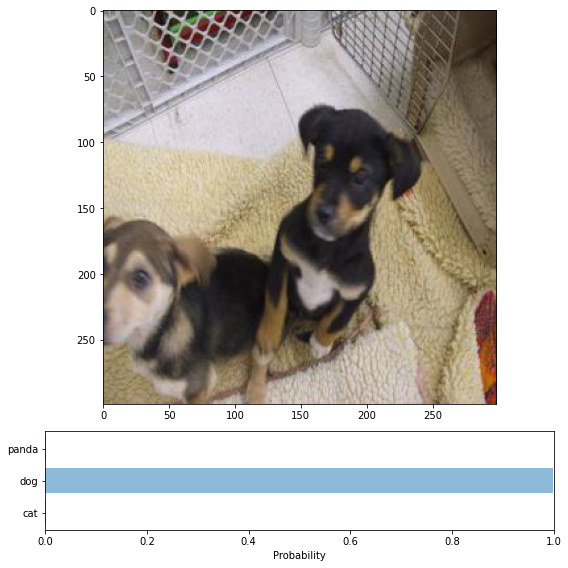

In [ ]:
img = image.load_img('test/dogs/dogs_00045.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)
preds_label = plot_preds(np.asarray(img), preds)
preds_label

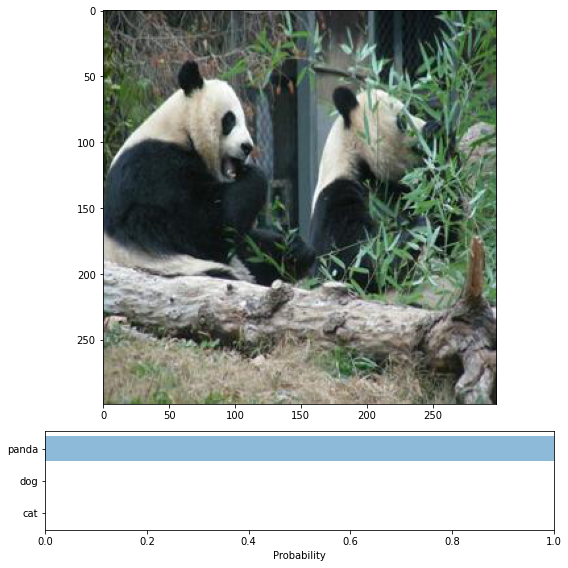

In [ ]:
img = image.load_img('test/panda/panda_00038.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)
preds_label = plot_preds(np.asarray(img), preds)
preds_label

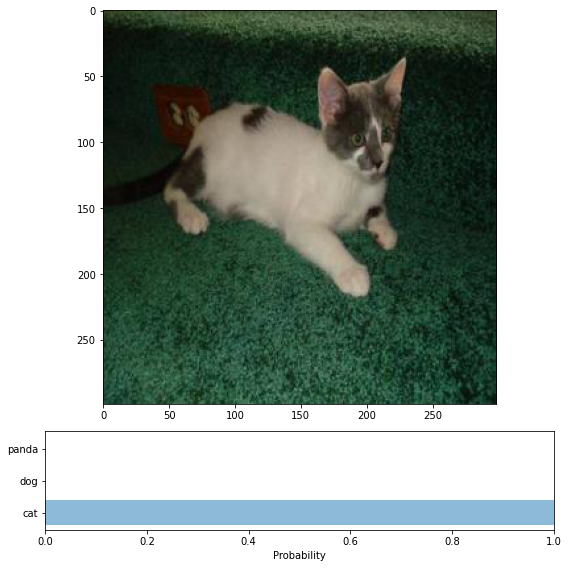

In [ ]:
img = image.load_img('test/cats/cats_00005.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(model, img)
preds_label = plot_preds(np.asarray(img), preds)
preds_label

In [ ]:
3
